In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd

# Import stats library from numpy
from scipy import stats

# These are the plotting modules and libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

# Change Theme of plots for better visualization
from jupyterthemes import jtplot

jtplot.style(context='talk', fscale=1, spines=True, gridlines='--')

In [2]:
titanic_df = pd.read_csv('train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Pclass: class of passenger (1st, 2nd, 3rd class)

Survived: 1 if true, 0 otherwise

SibSp (siblings on-board): 1 if true, 0 otherwise

Parch (parents or children on-board): 1 if true, 0 otherwise

Embarked (cities): S,C,Q

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


891 passengers, missing information in Age (714 entries) and Cabin (204 entries).

11 explanatory variables (excluding passenger ID)

Some questions that could be answered:


(1) Who were the passengers on the Titanic? (Name, Ages, Gender etc.)

(2) What deck were the passengers on? How does that relate to their class?

(3) Where did the passengers come from?

(4) Who was alone? Who was with their family?

# Who were the Passengers?

Use countplot to find the amount of males, females on-board

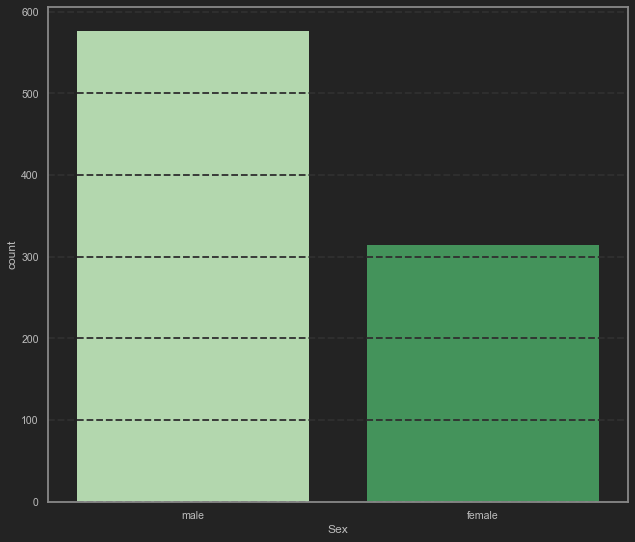

In [5]:
sns.countplot('Sex',data=titanic_df, palette = 'Greens')

Interested to see if sex is differentiated in passenger-class

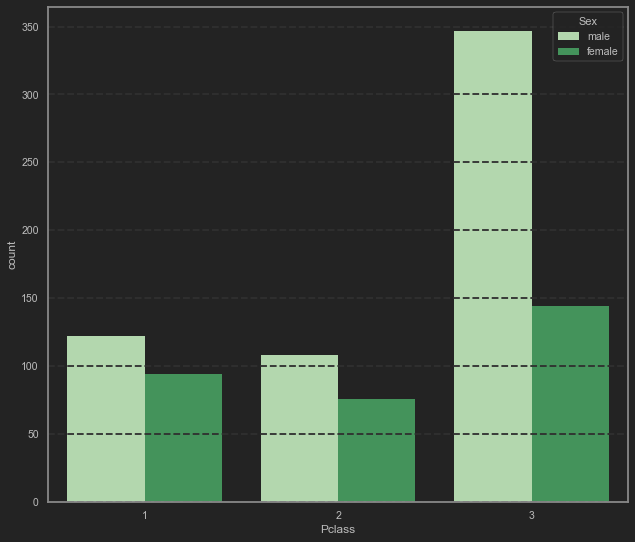

In [6]:
sns.countplot('Pclass',data=titanic_df, hue = 'Sex', palette = 'Greens')

Clearly see that there are more than x2 males than females in 3rd class. 

Majority of passengers were in 3rd class (to be expected).

Interested in seeing if children are more likely to be in 3rd class or not (predicted to be true).

In [7]:
def male_female_child(passenger):
    age,sex = passenger
    
    if age <= 14:
        return "Child"
    if sex == "male":
        return "Man"
    if sex == "female":
        return "Woman"
    

In [8]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [9]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Man
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Woman
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Woman
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Woman
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Man
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Man
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Man
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Woman
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Child


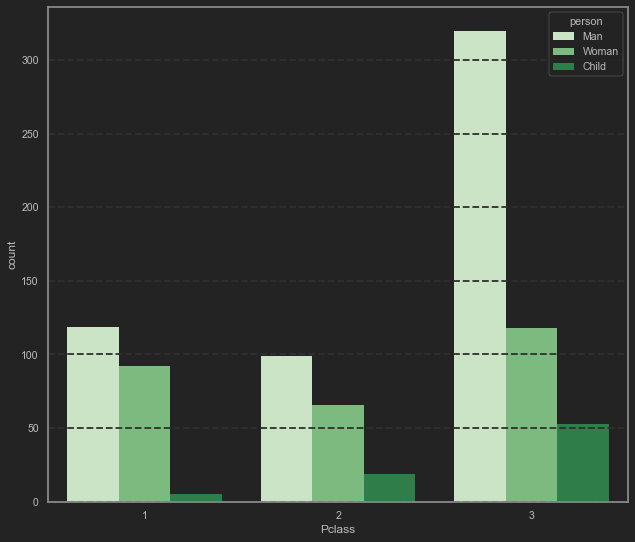

In [10]:
sns.countplot('Pclass',data=titanic_df, hue='person', palette = 'Greens')

Clearly there are more children in the 3rd Class as predicted.

Interested in the exact numbers of Males, Females, Children and its distribution.

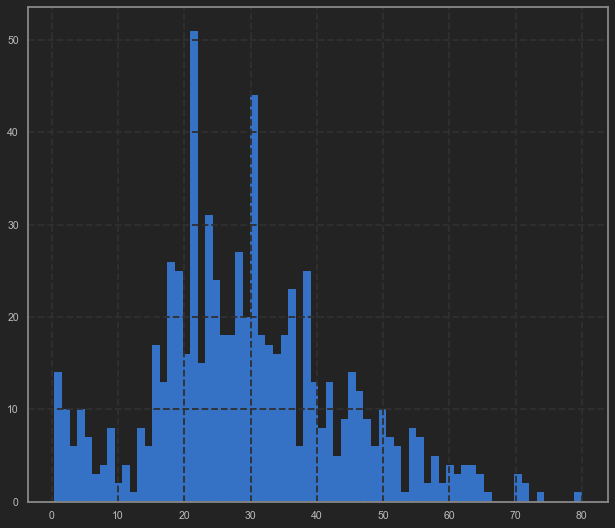

In [11]:
titanic_df['Age'].hist(bins=70)

In [12]:
titanic_df['Age'].mean()

29.69911764705882

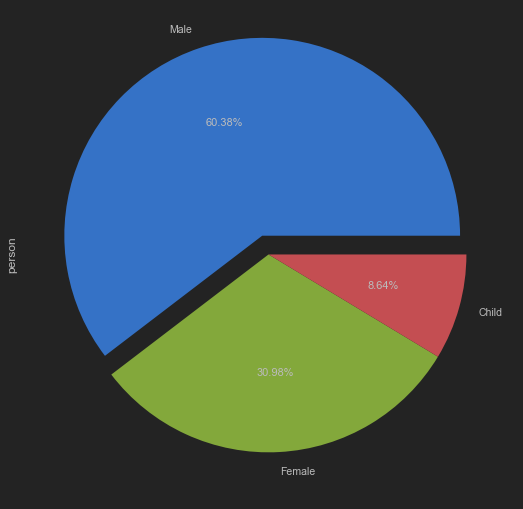

In [13]:
titanic_df['person'].value_counts().plot.pie(labels = ['Male','Female','Child'], autopct='%2.2f%%',explode = (0.1,0,0)) #Can see this more visually with a pie chart

Can see that Age is normally distributed and with a slight positive skewness.

Pie chart shows that males make up most of the data (60%) and taht a majority of them are in the 3rd class. 


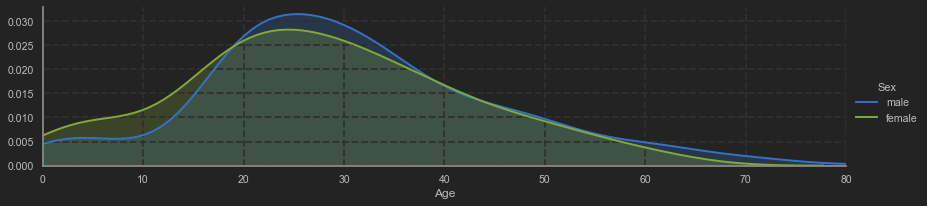

In [14]:
fig = sns.FacetGrid(titanic_df, hue='Sex',aspect=4)
fig.map(sns.kdeplot, 'Age', shade = True)

oldest_passenger = titanic_df['Age'].max()

fig.set(xlim = (0,oldest_passenger))
fig.add_legend()

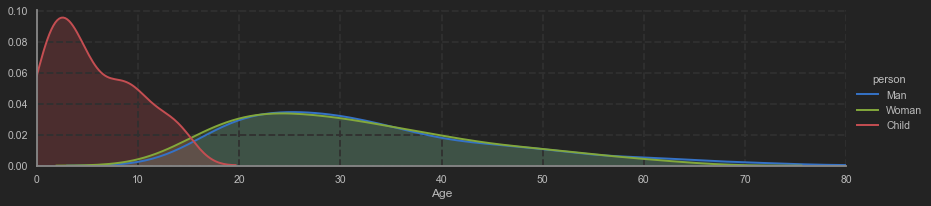

In [15]:
fig = sns.FacetGrid(titanic_df, hue='person',aspect=4)
fig.map(sns.kdeplot, 'Age', shade = True)

oldest_passenger = titanic_df['Age'].max()

fig.set(xlim = (0,oldest_passenger))
fig.add_legend()

Adults and children overlap each other as a results of the bandwidth parameter used to create the KDE plot.

From the two plots we can see that Age is normally distributed with positive skewness. 

Removing Children from the adults causes the distribution to smoothen out and create a cluster around the earlier ages.

# What deck were the Passengers on? How does this relate to their Class?

In [17]:
titanic_df.head()
#Cabin has a lot of NaN values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Man
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Woman
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Woman
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Woman
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Man


In [18]:
deck = titanic_df['Cabin'].dropna() #Remove all negative values

In [19]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

only need first element of deck to classify their levels

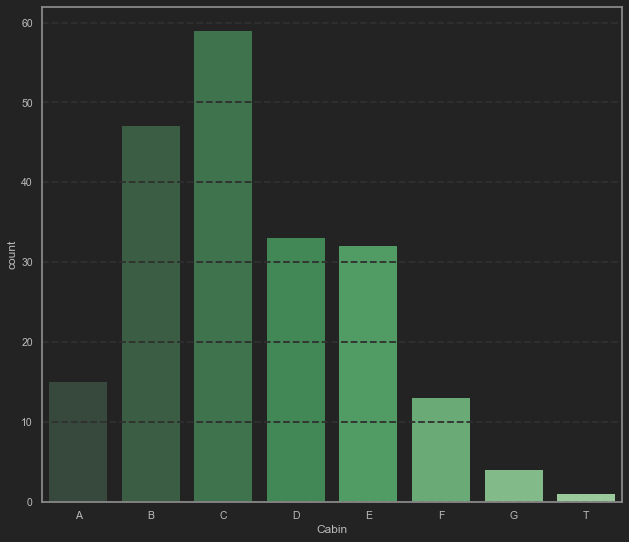

In [20]:
levels = []

for level in deck:
    levels.append(level[0])
    
cabin_df = pd.DataFrame(levels)
cabin_df.columns = ['Cabin']
cabin_df = cabin_df.sort_values(by='Cabin',ascending= True)

sns.countplot('Cabin',data = cabin_df, palette = 'Greens_d')

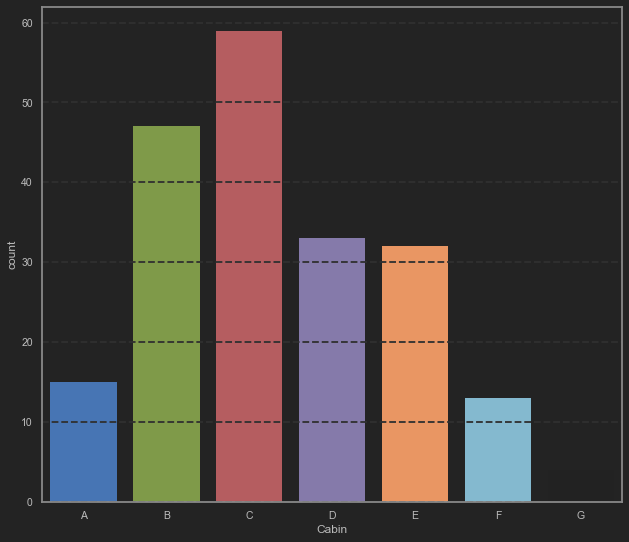

In [21]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.countplot('Cabin',data = cabin_df)

We can clearly see that a majority of passengers (accounted for) are within the cabins B,C,D,E with C being the most populated.

We can easily visualise the percentages of each Cabin to highlight the distribution of the passengers using a Pie chart and a KDE plot..

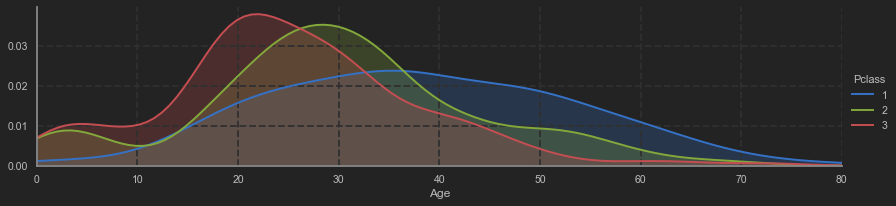

In [57]:
fig = sns.FacetGrid(titanic_df, hue='Pclass',aspect=4)
fig.map(sns.kdeplot, 'Age', shade = True)

oldest_passenger = titanic_df['Age'].max()

fig.set(xlim = (0,oldest_passenger))     #No one has an age under 0 or above the oldest passenger
fig.add_legend()

Majority of 1st class passengers are older.

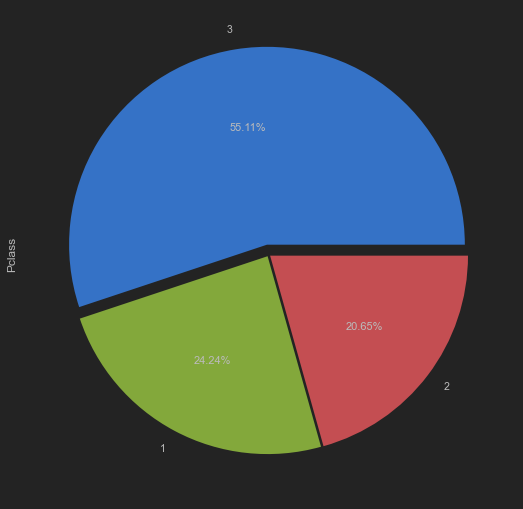

In [68]:
titanic_df['Pclass'].value_counts().plot.pie(autopct = '%1.2f%%', explode = (0.05,0.01,0.01))

Turns out that there are less people in 2nd class than in 1st class.

But as expected, 3rd class is the most populated.

# Where did the passengers come from?

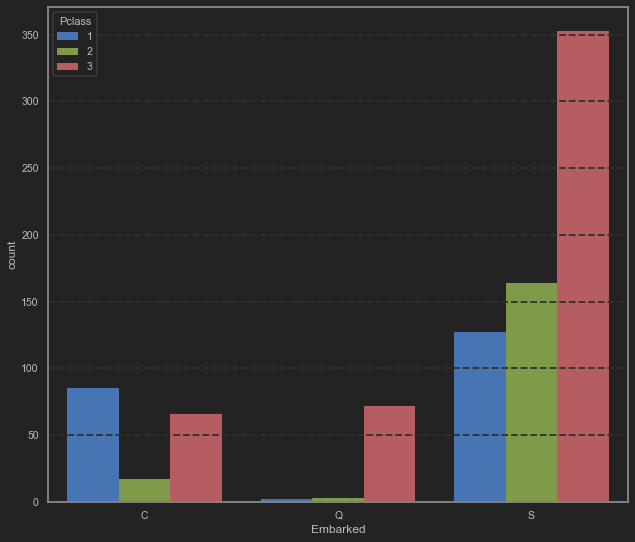

In [22]:
sns.countplot('Embarked', data = titanic_df, hue = 'Pclass', order = ['C','Q','S'])

Majority of people have come from City "S". Be useful to observe the economic state and population of each city at this time to help explain why the data
portrays this Bar chart.

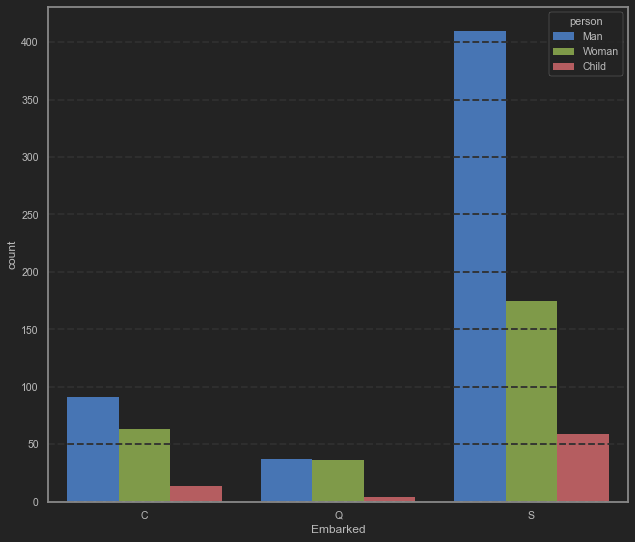

In [60]:
sns.countplot('Embarked', data = titanic_df, hue = 'person', order = ['C','Q','S'])

In [23]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

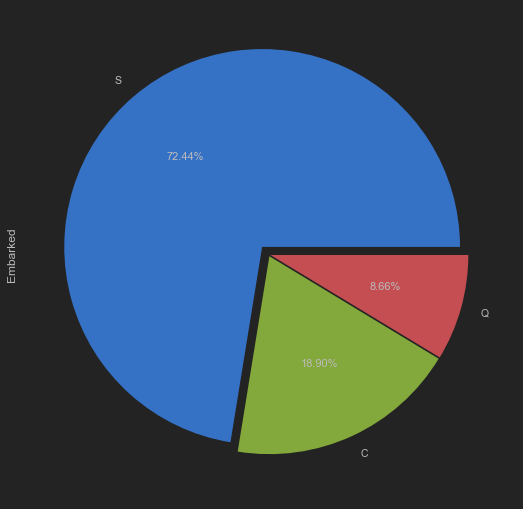

In [69]:
titanic_df['Embarked'].value_counts().plot.pie(autopct = '%1.2f%%', explode = (0.05,0.01,0.01))

# Who was alone? Who was with their family?

In [24]:
titanic_df.head() #Need SibSp and Parch

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Man
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Woman
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Woman
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Woman
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Man


In [25]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [26]:
titanic_df['Alone'] 
# If Alone column = 0 then they are alone, otherwise they had a sibling or parent

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [27]:
titanic_df['Alone'].loc[ titanic_df['Alone'] > 0 ] = 'With Family'

titanic_df['Alone'].loc[ titanic_df['Alone'] == 0] = 'Alone'

C:\Users\steph\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [28]:
titanic_df['Alone'].head()

0    With Family
1    With Family
2          Alone
3    With Family
4          Alone
Name: Alone, dtype: object

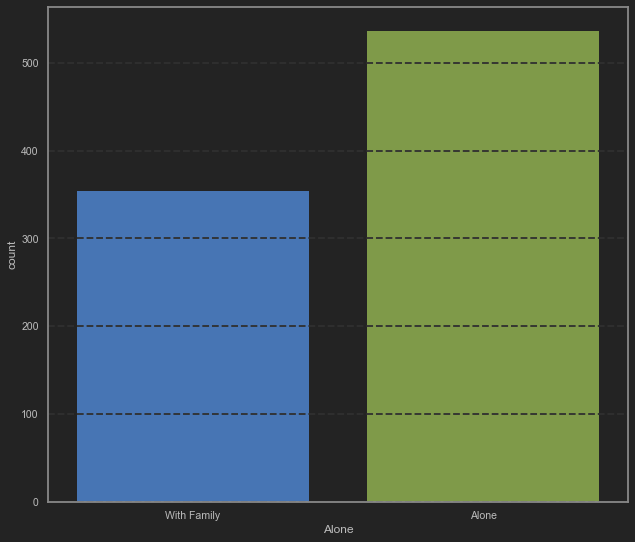

In [29]:
sns.countplot('Alone', data = titanic_df)

We see that the majority of passengers were alone

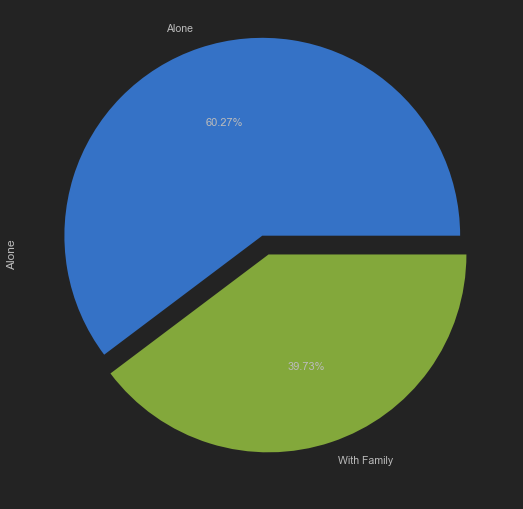

In [30]:
titanic_df['Alone'].value_counts().plot.pie(autopct = '%1.2f%%', explode = (0.1,0))

# What factors help passengers increase their survivability?

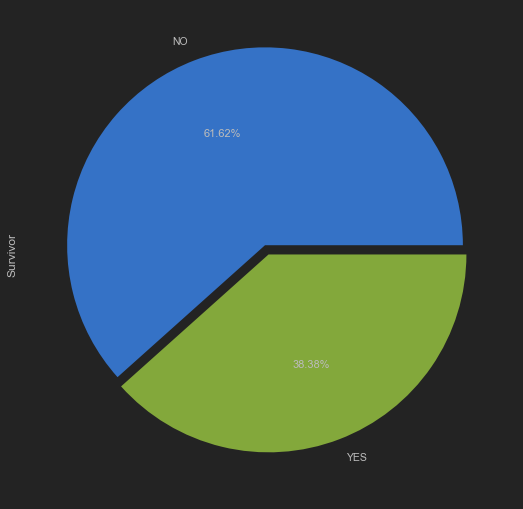

In [73]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'NO', 1:'YES'})

titanic_df['Survivor'].value_counts().plot.pie(autopct = '%1.2f%%', explode = (0.05,0))

More than 60% of the passengers did not survive.

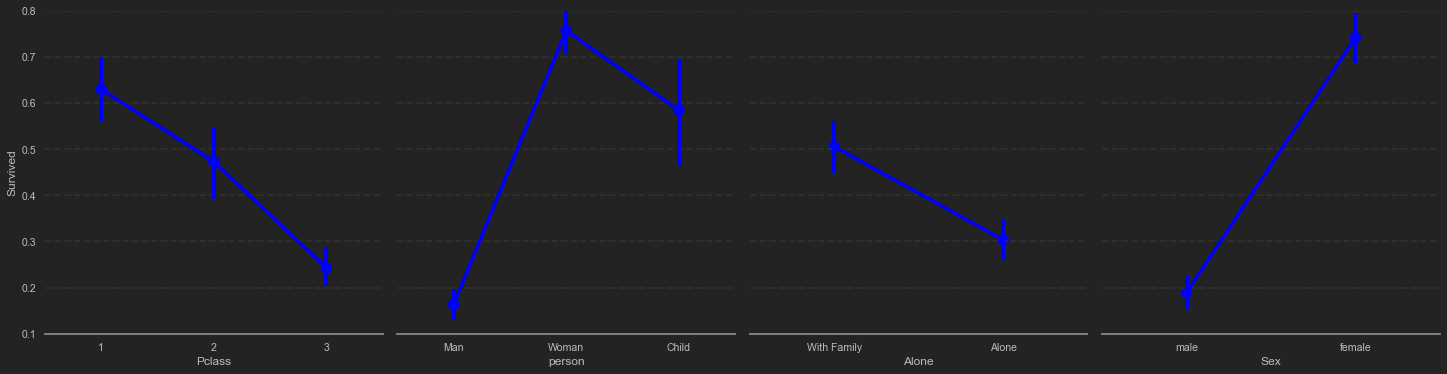

In [32]:
g = sns.PairGrid(titanic_df, y_vars="Survived",
                 x_vars=["Pclass","person","Alone","Sex"],
                 height=5, aspect=1)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, scale=1, errwidth=4, color="Blue")
g.set(ylim=(0.1, 0.8))
sns.despine(fig=g.fig, left=True)

We see that lower class passengers were much less likely to survive than 1st class. (Expected)

Men were significantly less likely to survive than Women and Children. (Expected)

Passengers with family are more likely to survive.

Females were dramatically more likely to survive. (Expected)

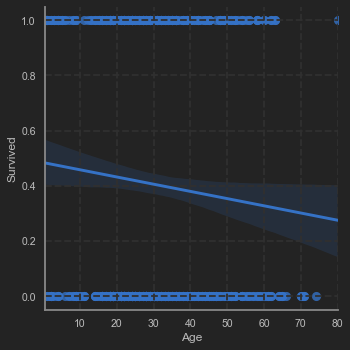

In [40]:
sns.lmplot('Age','Survived', data = titanic_df)

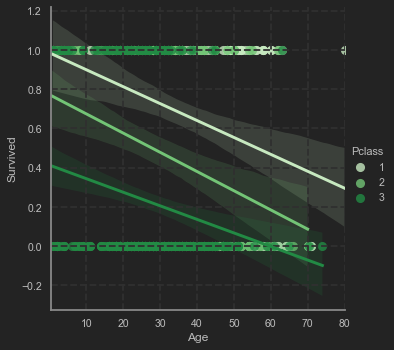

In [42]:
sns.lmplot('Age','Survived', hue = "Pclass", palette = "Greens", data = titanic_df)

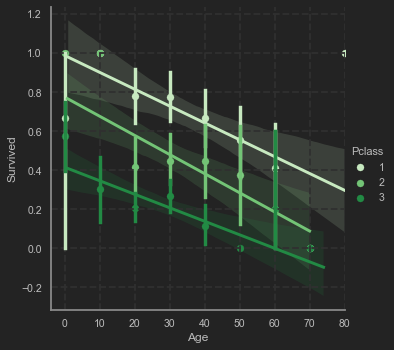

In [44]:
generations = np.arange(0,100,10)

sns.lmplot('Age','Survived', hue = 'Pclass', data = titanic_df, palette = "Greens", x_bins = generations)

We observe how age negatively decreases survivability as well as class.

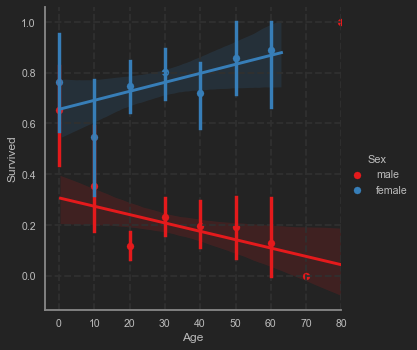

In [45]:
sns.lmplot('Age','Survived', hue = 'Sex', data = titanic_df, palette = "Set1", x_bins = generations)

Interestingly, as females grow older, the more likely they are to survive.

However, the same cannot be said about Males.